# MOVING AVERAGE

## Importing all the required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 12, 31)
df_amzn = web.DataReader('AMZN', 'yahoo', start, end) 
amzn= df_amzn.copy()
amzn.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010
2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951
2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966
2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015
2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995


In [3]:
amzn.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [4]:
amzn.shape

(503, 6)

In [5]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2018-01-02 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       503 non-null    float64
 1   Low        503 non-null    float64
 2   Open       503 non-null    float64
 3   Close      503 non-null    float64
 4   Volume     503 non-null    int64  
 5   Adj Close  503 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


In Stock trading, the **high**, **low** refers to the maximum and the minimum prices in a given time period. **Open** and **Close** are thhighLowOpenClosee prices at which a stock began and ended trading in the same period. **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

# Moving Average
<br><b>What Is Simple Moving Average (SMA)?</b></br>
<br>A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.</br>
<br>A simple moving average is a technical indicator that can aid in determining if an asset price will continue or if it will reverse a bull or bear trend</br>

# Example 
<br> Simple moving average for 5 days will be to calculate stock prices of last 5 days.</br>
<br>Say last 5 days prices were 25.4,25.9,26.5,26.3 and 27.9 then 
<br>Moving Average= Sum of all the last 5 days stock prices/5 </br>
<br>Moving Average= 26.4 </br>

# How Moving Average is useful ?
<br> Moving averages are an important analytical tool used to identify current price trends and the potential for a change in an established trend.</br> 
<br>The simplest use of an SMA in technical analysis is using it to quickly identify if a security is in an uptrend or downtrend.</br>
<br> The longer the time frame for the moving average, the smoother the simple moving average. A shorter-term moving average is more volatile, but its reading is closer to the source data.</br>

In [6]:
amzn["10d_sma"]=np.round(amzn["Close"].rolling(window=10,center=False).mean(),5)
amzn["50d_sma"]=np.round(amzn["Close"].rolling(window=50,center=False).mean(),5)
amzn.fillna(0,inplace=True)
amzn.tail(10)

,High,Low,Open,Close,Volume,Adj Close,10d_sma,50d_sma
Date,,,,,,,,
2019-12-17,1792.000000,1777.390015,1778.010010,1790.660034,3644400,1790.660034,1757.13497,1765.33619
2019-12-18,1798.199951,1782.359985,1795.020020,1784.030029,3351400,1784.030029,1759.46898,1766.90659
2019-12-19,1792.989990,1774.060059,1780.500000,1792.280029,2652800,1792.280029,1764.64899,1768.31240
2019-12-20,1802.969971,1782.449951,1799.619995,1786.500000,5150800,1786.500000,1768.13899,1769.63719
2019-12-23,1793.000000,1784.510010,1788.260010,1793.000000,2136400,1793.000000,1772.48799,1770.85879
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,1777.48799,1771.91439
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,1789.49299,1773.94219
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,1800.44000,1775.78959
2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015,1809.03501,1776.97779


Text(0, 0.5, 'Price in $')

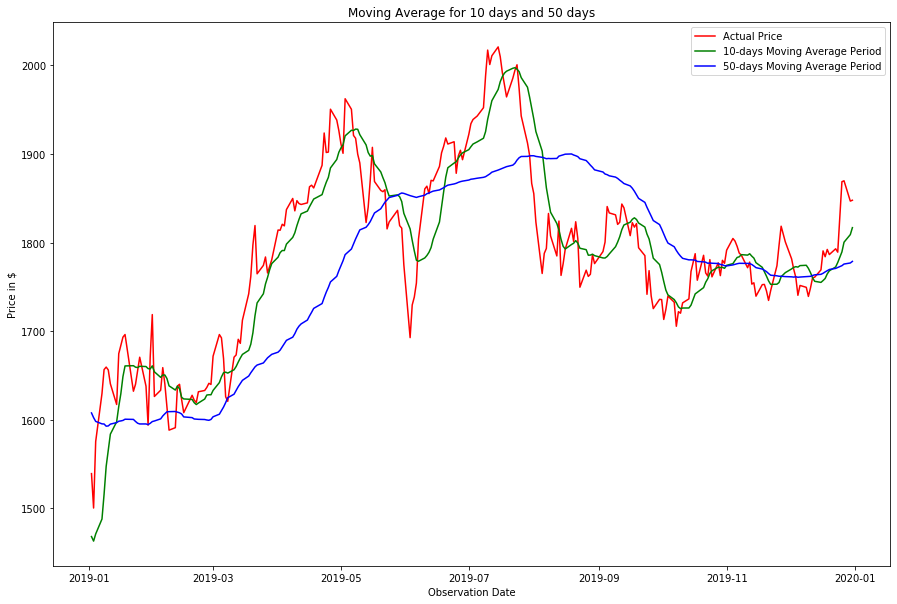

In [7]:
start_date = '2019-01-01'
end_date = '2019-12-31'

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, '10d_sma'], label = '10-days Moving Average Period', color = 'green')
ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, '50d_sma'], label = '50-days Moving Average Period', color = 'blue')

ax.legend(loc='best')
ax.set_title('Moving Average for 10 days and 50 days')
ax.set_xlabel('Observation Date')
ax.set_ylabel('Price in $')

# Observations:
<br>The 10 days may be of analytical benefit to a shorter-term trader since it follows the price more closely and therefore produces less "lag" but may be more volatile.</br>
<br> While the 50 days which is more smoother curve may be more beneficial to a longer-term trader.</br>

# Citation

1. https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
2. https://www.investopedia.com/terms/s/sma.asp